## FBA simulation E.coli
Simulating the FBA part of the E.coli model with `cobrapy`. Implements checks that
* model is simulating
* gene deletions
* uniqueness of solutions
* drive the model via exchange reactions

This requires
* `cobrapy >= 0.6.2`

In [27]:
from __future__ import print_function, absolute_import

import pandas as pd
import cobra
from matplotlib import pyplot as plt

from sbmlutils import fbc
from sbmlutils.dfba.analysis import set_matplotlib_parameters
from sbmlutils.dfba.ecoli import model_factory

set_matplotlib_parameters()

In [28]:
# load model
sbml_path = './results/v{}/ecoli_fba.xml'.format(model_factory.version)
print(sbml_path)
model = cobra.io.read_sbml_model(sbml_path)
cobra.io.sbml3.validate_sbml_model(sbml_path)

./results/v7/ecoli_fba.xml


(<Model ecoli_fba at 0x7fa18b637710>,
 {'SBML errors': [], 'other': [], 'validator': [], 'warnings': []})

In [29]:
# objective function & boundaries
# pprint(mfba.objective)
df = fbc.cobra_reaction_info(model)
print(df.head())
print("reactions:", len(model.reactions))
print("metabolites:", len(model.metabolites))
print("genes:", len(model.genes))


          lb    ub reversibility boundary objective_coefficient  \
ACALD  -1000  1000          True    False                     0   
ACALDt -1000  1000          True    False                     0   
ACKr   -1000  1000          True    False                     0   
ACONTa -1000  1000          True    False                     0   
ACONTb -1000  1000          True    False                     0   

             forward_variable                     reverse_variable  
ACALD    0 <= ACALD <= 1000.0   0 <= ACALD_reverse_fda2b <= 1000.0  
ACALDt  0 <= ACALDt <= 1000.0  0 <= ACALDt_reverse_858fa <= 1000.0  
ACKr      0 <= ACKr <= 1000.0    0 <= ACKr_reverse_b49c0 <= 1000.0  
ACONTa  0 <= ACONTa <= 1000.0  0 <= ACONTa_reverse_cad6d <= 1000.0  
ACONTb  0 <= ACONTb <= 1000.0  0 <= ACONTb_reverse_e198a <= 1000.0  
reactions: 96
metabolites: 73
genes: 137


In [30]:
# Exchange reactions
ex_idx = df.index.str.contains('^EX_')
df[ex_idx]

,lb,ub,reversibility,boundary,objective_coefficient,forward_variable,reverse_variable
EX_ac_e,0,1000,False,True,0,0.0 <= EX_ac_e <= 1000.0,0 <= EX_ac_e_reverse_0be96 <= 0
EX_acald_e,0,1000,False,True,0,0.0 <= EX_acald_e <= 1000.0,0 <= EX_acald_e_reverse_c096e <= 0
EX_akg_e,0,1000,False,True,0,0.0 <= EX_akg_e <= 1000.0,0 <= EX_akg_e_reverse_70d85 <= 0
EX_co2_e,-1000,1000,True,True,0,0 <= EX_co2_e <= 1000.0,0 <= EX_co2_e_reverse_d0466 <= 1000.0
EX_etoh_e,0,1000,False,True,0,0.0 <= EX_etoh_e <= 1000.0,0 <= EX_etoh_e_reverse_cc64f <= 0
EX_for_e,0,1000,False,True,0,0.0 <= EX_for_e <= 1000.0,0 <= EX_for_e_reverse_23269 <= 0
EX_fru_e,0,1000,False,True,0,0.0 <= EX_fru_e <= 1000.0,0 <= EX_fru_e_reverse_c3828 <= 0
EX_fum_e,0,1000,False,True,0,0.0 <= EX_fum_e <= 1000.0,0 <= EX_fum_e_reverse_e3432 <= 0
EX_glc__D_e,-10,1000,True,True,0,0 <= EX_glc__D_e <= 1000.0,0 <= EX_glc__D_e_reverse_af641 <= 10.0
EX_gln__L_e,0,1000,False,True,0,0.0 <= EX_gln__L_e <= 1000.0,0 <= EX_gln__L_e_reverse_6a1a1 <= 0


In [32]:
df[['BIOMASS_Ecoli_core_w_GAM']]

KeyError: "['BIOMASS_Ecoli_core_w_GAM'] not in index"

In [5]:
model.reactions.BIOMASS_Ecoli_core_w_GAM.reaction

'1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0.361 e4p_c + 0.0709 f6p_c + 0.129 g3p_c + 0.205 g6p_c + 0.2557 gln__L_c + 4.9414 glu__L_c + 59.81 h2o_c + 3.547 nad_c + 13.0279 nadph_c + 1.7867 oaa_c + 0.5191 pep_c + 2.8328 pyr_c + 0.8977 r5p_c --> X + 59.81 adp_c + 4.1182 akg_c + 3.7478 coa_c + 59.81 h_c + 3.547 nadh_c + 13.0279 nadp_c + 59.81 pi_c'

In [6]:
# optimize
s = model.optimize(objective_sense="maximize")
model.summary(fva=True)

IN FLUXES                       OUT FLUXES                     OBJECTIVES
------------------------------  -----------------------------  ----------------------
id          Flux  Range         id       Flux  Range           BIOMASS_Ecol...  0.917
--------  ------  ------------  -----  ------  --------------
o2_e       19.9   [19.9, 19.9]  h2o_e  27.7    [27.7, 27.7]
glc__D_e   10     [10, 10]      co2_e  21      [21, 21]
nh4_e       5     [5, 5]        h_e    18.4    [18.4, 18.4]
pi_e        3.37  [3.37, 3.37]  X       0.917  [0.917, 0.917]


In [7]:
# pfba (minimal flux)
# no difference, the flux variability analysis 
# already showed us that the model has unique solution under given bounds 
s = model.optimize(objective_sense="maximize")
cobra.flux_analysis.pfba(model)
model.summary(fva=True)

IN FLUXES                       OUT FLUXES                     OBJECTIVES
------------------------------  -----------------------------  ----------------------
id          Flux  Range         id       Flux  Range           BIOMASS_Ecol...  0.917
--------  ------  ------------  -----  ------  --------------
o2_e       19.9   [19.9, 19.9]  h2o_e  27.7    [27.7, 27.7]
glc__D_e   10     [10, 10]      co2_e  21      [21, 21]
nh4_e       5     [5, 5]        h_e    18.4    [18.4, 18.4]
pi_e        3.37  [3.37, 3.37]  X       0.917  [0.917, 0.917]


Network map:  
https://escher.github.io/builder/index.html?enable_editing=true&map_name=e_coli_core.Core%20metabolism

In [8]:
# what happens to glucose ?
# single reaction to 
print(model.metabolites.glc__D_e.summary())

PRODUCING REACTIONS -- D-Glucose (glc__D_e)
-------------------------------------------
%       FLUX  RXN ID      REACTION
----  ------  ----------  ----------------------------------
100%      10  EX_glc_...  glc__D_e <=>

CONSUMING REACTIONS -- D-Glucose (glc__D_e)
-------------------------------------------
%       FLUX  RXN ID      REACTION
----  ------  ----------  ----------------------------------
100%      10  GLCpts      glc__D_e + pep_c --> g6p_c + pyr_c
None


In [9]:
# What is going on with the ATPM reaction
print(model.reactions.ATPM.reaction)

atp_c + h2o_c --> adp_c + h_c + pi_c


In [10]:
# gene and reaction deletions
from cobra.flux_analysis import (
    single_gene_deletion, single_reaction_deletion, double_gene_deletion,
    double_reaction_deletion)
# single_gene_deletion(model)
import numpy as np
r_del = single_reaction_deletion(model)
r_del['percent'] = np.round(r_del['flux']/0.9166, 3)
r_del.sort_values(by=['flux'])

,flux,status,percent
RPI,-2.280110e-14,optimal,-0.000
EX_pi_e,-4.655717e-15,optimal,-0.000
ENO,-1.243460e-15,optimal,-0.000
PGK,-3.141578e-16,optimal,-0.000
GAPD,-1.110954e-16,optimal,-0.000
ICDHyr,-5.332480e-17,optimal,-0.000
EX_nh4_e,-5.244983e-17,optimal,-0.000
PGM,-5.197874e-17,optimal,-0.000
GLCpts,-4.060283e-17,optimal,-0.000
NH4t,-1.240376e-17,optimal,-0.000


## Change the bounds
Driving the model via changing the bounds of the exchange reactions
* in coupling based on maximal uptake rates and availability of substrate

In [11]:
import numpy as np
import pandas as pd

# set of bounds (we can't go to zero, a minimal amount of glc is needed for biomass generation)
# More complete models could switch to alternative carbon sources
glc_bounds = np.linspace(-10, -0.5, 10)

results = []
for lb_glc in glc_bounds:
    # set the lower bound (uptake direction) of the exchange reaction
    print(lb_glc)
    model.reactions.get_by_id("EX_glc__D_e").lower_bound = lb_glc
    # pFBA
    s = model.optimize(objective_sense="maximize")
    s = cobra.flux_analysis.pfba(model)
    model.summary(fva=True)
    
    fluxes = s.fluxes
    results.append(fluxes)
df = pd.DataFrame(results)

-10.0
IN FLUXES                       OUT FLUXES                     OBJECTIVES
------------------------------  -----------------------------  ----------------------
id          Flux  Range         id       Flux  Range           BIOMASS_Ecol...  0.917
--------  ------  ------------  -----  ------  --------------
o2_e       19.9   [19.9, 19.9]  h2o_e  27.7    [27.7, 27.7]
glc__D_e   10     [10, 10]      co2_e  21      [21, 21]
nh4_e       5     [5, 5]        h_e    18.4    [18.4, 18.4]
pi_e        3.37  [3.37, 3.37]  X       0.917  [0.917, 0.917]
-8.94444444444
IN FLUXES                       OUT FLUXES                   OBJECTIVES
------------------------------  ---------------------------  ---------------------
id          Flux  Range         id       Flux  Range         BIOMASS_Ecol...  0.82
--------  ------  ------------  -----  ------  ------------
o2_e       17.8   [17.8, 17.8]  h2o_e   24.7   [24.7, 24.7]
glc__D_e    8.94  [8.94, 8.94]  co2_e   18.8   [18.8, 18.8]
nh4_e       4.4

In [12]:
# Find Exchange reactions & Internal Reactions
ex_rids = []
in_rids = []
for r in model.reactions:
    rid = r.id
    if (rid.startswith('EX_')):
        ex_rids.append(rid)
    else:
        in_rids.append(rid)
        
# print(ex_rids)
# print()
# print(in_rids)

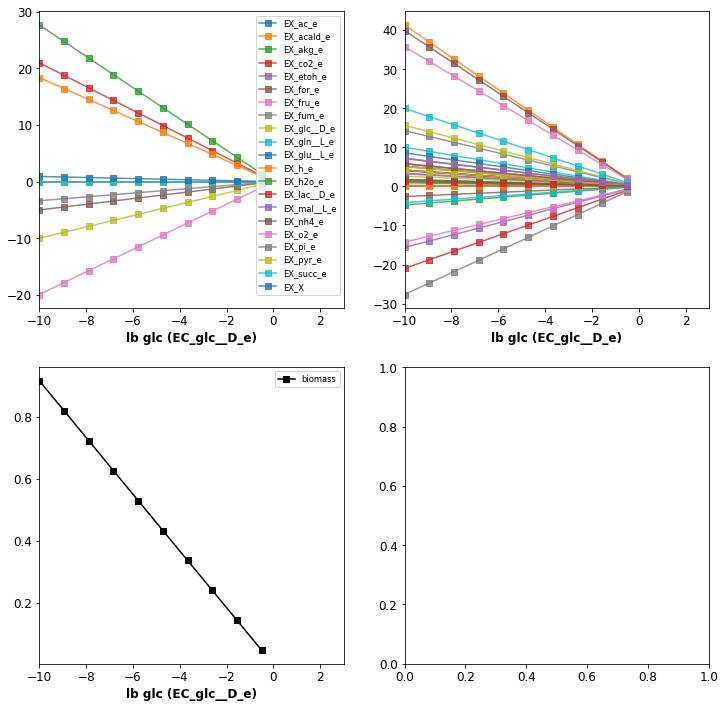

In [13]:
# Plot internal, external, and biomass reactions
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

for rid in ex_rids:
    ax1.plot(glc_bounds, df[rid], marker='s', alpha=0.8, label=rid)

for rid in in_rids:
    ax2.plot(glc_bounds, df[rid], marker='s', alpha=0.8, label=rid)

ax3.plot(glc_bounds, df["BIOMASS_Ecoli_core_w_GAM"], color="black", label="biomass",
        marker="s")
    
for ax in [ax1, ax2, ax3]:
    ax.set_xlabel('lb glc (EC_glc__D_e)')
    ax.set_xlim(-10,3)

ax1.legend()
ax3.legend()

plt.show()
fig.savefig("ecoli_glc_dependency.png", bbox="tight")

## FVA
Flux variability analysis of solution.

In [16]:
# reload clean model
model = cobra.io.read_sbml_model(sbml_path)
s = model.optimize(objective_sense="maximize")
model.summary(fva=True)

IN FLUXES                       OUT FLUXES                     OBJECTIVES
------------------------------  -----------------------------  ----------------------
id          Flux  Range         id       Flux  Range           BIOMASS_Ecol...  0.917
--------  ------  ------------  -----  ------  --------------
o2_e       19.9   [19.9, 19.9]  h2o_e  27.7    [27.7, 27.7]
glc__D_e   10     [10, 10]      co2_e  21      [21, 21]
nh4_e       5     [5, 5]        h_e    18.4    [18.4, 18.4]
pi_e        3.37  [3.37, 3.37]  X       0.917  [0.917, 0.917]
